## Acknowledgments
- [chunhuizhang](https://github.com/chunhuizhang)

## code
- [grad dir](https://github.com/chunhuizhang/bilibili_vlogs/tree/master/learn_torch/grad)
- [basic](https://github.com/chunhuizhang/bilibili_vlogs/blob/master/learn_torch/grad/03_computation_graph.ipynb)
- [forward & backward](https://github.com/chunhuizhang/bilibili_vlogs/blob/master/learn_torch/grad/04_backward_step.ipynb)

## process
- [✅] grad
- [✅] partial derivaties
- [✅] compute graph
- [❌] forward & backward

In [467]:
import torch
import numpy as np
from IPython.display import Image

In [468]:
x = torch.tensor(3., requires_grad=True)

In [469]:
print(x.data)
print(x.grad)
print(x.is_leaf)
print(x.requires_grad)

tensor(3.)
None
True
True


In [470]:
y = 6*x**2 + 2*x + 4

In [471]:
print(y.data)
print(y.grad)
print(y.is_leaf)
print(y.requires_grad)

tensor(64.)
None
False
True


/var/folders/0m/5js4g21n0kx9ld1w4n9bqk5m0000gn/T/ipykernel_19509/161933282.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1716905753432/work/build/aten/src/ATen/core/TensorBody.h:494.)
  print(y.grad)


UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1716905753432/work/build/aten/src/ATen/core/TensorBody.h:494.)
  print(y.grad)

这个警告信息是 PyTorch 关于梯度计算的提示，解释如下：

核心问题：你正在尝试访问一个非叶子张量(non-leaf Tensor)的 .grad 属性，但默认情况下 PyTorch 不会为非叶子张量保存梯度值。

关键概念：

叶子张量(leaf Tensor)：直接由用户创建的张量（如 torch.tensor() 或 nn.Parameter）

非叶子张量(non-leaf Tensor)：通过运算从叶子张量计算得到的张量

解决方案：

如果你确实需要非叶子张量的梯度，可以在计算后立即调用 .retain_grad()

如果这是误操作，你应该访问原始叶子张量的梯度

In [472]:
y.backward()

x.grad = 12 * x + 2 

In [473]:
print(x.data)
print(x.grad)
print(x.is_leaf)
print(x.requires_grad)

tensor(3.)
tensor(38.)
True
True


In [474]:
print(y.data)
print(y.grad)
print(y.is_leaf)
print(y.requires_grad)

tensor(64.)
None
False
True


/var/folders/0m/5js4g21n0kx9ld1w4n9bqk5m0000gn/T/ipykernel_19509/161933282.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1716905753432/work/build/aten/src/ATen/core/TensorBody.h:494.)
  print(y.grad)


In [475]:
u = torch.tensor(3., requires_grad=True)
v = torch.tensor(4., requires_grad=True)

In [476]:
f = u**3 + v**2 + 4*u*v

In [477]:
f.backward()

- `u.grad` = 3*u**2 + 4*v = 27 + 16 = 43

In [478]:
u.grad


tensor(43.)

- `v.grad` = 2 * v + 4*u =  = 8 + 12 = 

In [479]:
v.grad

tensor(20.)

In [480]:
import torch
a = torch.randn((3,3),requires_grad=True)

w1 = torch.randn((3,3),requires_grad=True)
w2 = torch.randn((3,3),requires_grad=True)
w3 = torch.randn((3,3),requires_grad=True)
w4 = torch.randn((3,3),requires_grad=True)

b = w1 * a
c = w2 * a
d = w3 * a + w4 * a

L = 10 - d

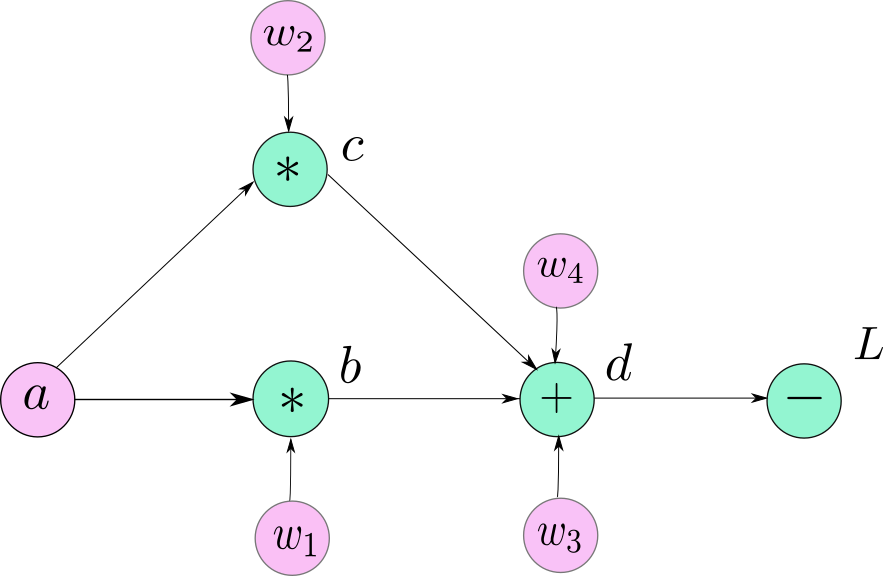

In [481]:
Image('./imgs/comp_graph.png')

In [482]:
a.is_leaf

True

In [483]:
w1.is_leaf

True

In [484]:
w4.is_leaf

True

In [485]:
L

tensor([[10.6305,  9.7448,  9.9843],
        [11.1035, 10.1987, 10.6742],
        [ 9.9449,  9.9449,  9.3269]], grad_fn=<RsubBackward1>)

In [486]:
#L.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

In [ ]:
import torch

a = torch.randn((3,3),requires_grad=True)

w1 = torch.randn((3,3),requires_grad=True)
w2 = torch.randn((3,3),requires_grad=True)
w3 = torch.randn((3,3),requires_grad=True)
w4 = torch.randn((3,3),requires_grad=True)

b = w1 * a
c = w2 * a

d = w3 * b + w4 * c
d.retain_grad()
L = (10-d).sum()


In [488]:
%timeit
L

tensor(88.3974, grad_fn=<SumBackward0>)